In [5]:
# !pip install pandas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [2]:
import os
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, 'DATA')

In [3]:
columns_df = pd.read_csv(os.path.join(data_dir, 'census-bureau.columns'), sep=',', header=None)
columns_df[0].values

array(['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat',
       'major industry code', 'major occupation code', 'race',
       'hispanic origin', 'sex', 'member of a labor union',
       'reason for unemployment', 'full or part time employment stat',
       'capital gains', 'capital losses', 'dividends from stocks',
       'tax filer stat', 'region of previous residence',
       'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household', 'weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
   

In [4]:
# renaming columns based on : https://docs.1010data.com/Tutorials/MachineLearningExamples/CensusIncomeDataSet.html

renamed_columns_map = {
  'age' : 'age' ,
  'class of worker' : 'class_worker' ,
  'detailed industry recode' : 'det_ind_code' ,
  'detailed occupation recode' : 'det_occ_code' ,
  'education' : 'education' ,
  'wage per hour' : 'wage_per_hour' ,
  'enroll in edu inst last wk' : 'hs_college' ,
  'marital stat' : 'marital_stat' ,
  'major industry code' : 'major_ind_code' ,
  'major occupation code' : 'major_occ_code' ,
  'race' : 'race' ,
  'hispanic origin' : 'hisp_origin' ,
  'sex' : 'sex' ,
  'member of a labor union' : 'union_member' ,
  'reason for unemployment' : 'unemp_reason' ,
  'full or part time employment stat' : 'full_or_part_emp' ,
  'capital gains' : 'capital_gains' ,
  'capital losses' : 'capital_losses' ,
  'dividends from stocks' : 'stock_dividends' ,
  'tax filer stat' : 'tax_filer_stat' ,
  'region of previous residence' : 'region_prev_res' ,
  'state of previous residence' : 'state_prev_res' ,
  'detailed household and family stat' : 'det_hh_fam_stat' ,
  'detailed household summary in household' : 'det_hh_summ' ,
  'weight' : 'weight' ,
  'migration code-change in msa' : 'mig_chg_msa' ,
  'migration code-change in reg' : 'mig_chg_reg' ,
  'migration code-move within reg' : 'mig_move_reg' ,
  'live in this house 1 year ago' : 'mig_same' ,
  'migration prev res in sunbelt' : 'mig_prev_sunbelt' ,
  'num persons worked for employer' : 'num_emp' ,
  'family members under 18' : 'fam_under_18' ,
  'country of birth father' : 'country_father' ,
  'country of birth mother' : 'country_mother' ,
  'country of birth self' : 'country_self' ,
  'citizenship' : 'citizenship' ,
  'own business or self employed' : 'own_or_self' ,
  "fill inc questionnaire for veteran's admin" : 'vet_question' ,
  'veterans benefits' : 'vet_benefits' ,
  'weeks worked in year' : 'weeks_worked' ,
  'year' : 'year' ,
  'label' : 'income_50k'
}


In [5]:
data_df = pd.read_csv(os.path.join(data_dir, 'census-bureau.data'), sep=',' , header=None)
data_df.columns = columns_df[0].values
# rename columns in-place (assign back to data_df)
data_df = data_df.rename(columns=renamed_columns_map)
data_df.head()

,age,class_worker,det_ind_code,det_occ_code,education,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,...,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year,income_50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [6]:
data_df.columns

Index(['age', 'class_worker', 'det_ind_code', 'det_occ_code', 'education',
       'wage_per_hour', 'hs_college', 'marital_stat', 'major_ind_code',
       'major_occ_code', 'race', 'hisp_origin', 'sex', 'union_member',
       'unemp_reason', 'full_or_part_emp', 'capital_gains', 'capital_losses',
       'stock_dividends', 'tax_filer_stat', 'region_prev_res',
       'state_prev_res', 'det_hh_fam_stat', 'det_hh_summ', 'weight',
       'mig_chg_msa', 'mig_chg_reg', 'mig_move_reg', 'mig_same',
       'mig_prev_sunbelt', 'num_emp', 'fam_under_18', 'country_father',
       'country_mother', 'country_self', 'citizenship', 'own_or_self',
       'vet_question', 'vet_benefits', 'weeks_worked', 'year', 'income_50k'],
      dtype='object')

In [7]:
weights = data_df['weight'].copy()
data_df.drop('weight', axis=1, inplace=True)

### Identifying redundant columns

In [8]:
data_df.describe(include='all')

,age,class_worker,det_ind_code,det_occ_code,education,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,...,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year,income_50k
count,199523.000000,199523,199523.000000,199523.000000,199523,199523.000000,199523,199523,199523,199523,...,199523,199523,199523,199523,199523.000000,199523,199523.000000,199523.000000,199523.000000,199523
unique,NaN,9,NaN,NaN,17,NaN,3,7,24,15,...,43,43,43,5,NaN,3,NaN,NaN,NaN,2
top,NaN,Not in universe,NaN,NaN,High school graduate,NaN,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,NaN,Not in universe,NaN,NaN,NaN,- 50000.
freq,NaN,100245,NaN,NaN,48407,NaN,186943,86485,100684,100684,...,159163,160479,176989,176992,NaN,197539,NaN,NaN,NaN,187141
mean,34.494199,NaN,15.352320,11.306556,NaN,55.426908,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.175438,NaN,1.514833,23.174897,94.499672,NaN
std,22.310895,NaN,18.067129,14.454204,NaN,274.896454,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.553694,NaN,0.851473,24.411488,0.500001,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,94.000000,NaN
25%,15.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000,94.000000,NaN
50%,33.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,8.000000,94.000000,NaN
75%,50.000000,NaN,33.000000,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,52.000000,95.000000,NaN


In [9]:
cat_cols = data_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    data_df[col] = data_df[col].str.strip()

# since edu is categorical with many levels and ordinal, we can map to numerical years of education
edu_map = {
    'Children': 0,
    'Less than 1st grade': 0.5,
    '1st 2nd 3rd or 4th grade': 2.5,
    '5th or 6th grade': 5.5,
    '7th and 8th grade': 7.5,
    '9th grade': 9,
    '10th grade': 10,
    '11th grade': 11,
    '12th grade no diploma': 12,
    'High school graduate': 12,
    'Some college but no degree': 14,
    'Associates degree-academic program': 14,
    'Associates degree-occup /vocational': 14,
    'Bachelors degree(BA AB BS)': 16,
    'Masters degree(MA MS MEng MEd MSW MBA)': 18,
    'Prof school degree (MD DDS DVM LLB JD)': 20,
    'Doctorate degree(PhD EdD)': 21
}

# Map values; fill unknown keys with NaN (or mode if preferred)
data_df['edu_year'] = data_df['education'].map(edu_map)

In [10]:
data_df.drop('education', axis=1, inplace=True)

In [11]:
data_df.columns

Index(['age', 'class_worker', 'det_ind_code', 'det_occ_code', 'wage_per_hour',
       'hs_college', 'marital_stat', 'major_ind_code', 'major_occ_code',
       'race', 'hisp_origin', 'sex', 'union_member', 'unemp_reason',
       'full_or_part_emp', 'capital_gains', 'capital_losses',
       'stock_dividends', 'tax_filer_stat', 'region_prev_res',
       'state_prev_res', 'det_hh_fam_stat', 'det_hh_summ', 'mig_chg_msa',
       'mig_chg_reg', 'mig_move_reg', 'mig_same', 'mig_prev_sunbelt',
       'num_emp', 'fam_under_18', 'country_father', 'country_mother',
       'country_self', 'citizenship', 'own_or_self', 'vet_question',
       'vet_benefits', 'weeks_worked', 'year', 'income_50k', 'edu_year'],
      dtype='object')

In [12]:
data_df.replace('?', np.nan, inplace=True)
data_df.isna().sum()

age                     0
class_worker            0
det_ind_code            0
det_occ_code            0
wage_per_hour           0
hs_college              0
marital_stat            0
major_ind_code          0
major_occ_code          0
race                    0
hisp_origin           874
sex                     0
union_member            0
unemp_reason            0
full_or_part_emp        0
capital_gains           0
capital_losses          0
stock_dividends         0
tax_filer_stat          0
region_prev_res         0
state_prev_res        708
det_hh_fam_stat         0
det_hh_summ             0
mig_chg_msa         99696
mig_chg_reg         99696
mig_move_reg        99696
mig_same                0
mig_prev_sunbelt    99696
num_emp                 0
fam_under_18            0
country_father       6713
country_mother       6119
country_self         3393
citizenship             0
own_or_self             0
vet_question            0
vet_benefits            0
weeks_worked            0
year        

In [13]:
# Impute strategies
for col in data_df.columns:
    if data_df[col].dtype == 'object':
        # For categorical, fill with mode
        data_df[col] = data_df[col].fillna(data_df[col].mode()[0])
    else:
        # For numerical, fill with median
        data_df[col] = data_df[col].fillna(data_df[col].median())

In [14]:
target_map = {'- 50000.': 0, '50000+.': 1}
data_df['income_50k'] = data_df['income_50k'].map(target_map)

In [15]:
X = data_df.drop('income_50k', axis=1)
y = data_df['income_50k']

# Update categorical columns list (exclude target)
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

In [16]:
encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

In [17]:
X

,age,class_worker,det_ind_code,det_occ_code,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,race,...,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year,edu_year
0,73,3,0,0,0,2,6,14,6,4,...,39,39,39,4,0,1,2,0,95,12.0
1,58,6,4,34,0,2,0,4,8,4,...,39,39,39,4,0,1,2,52,94,14.0
2,18,3,0,0,0,1,4,14,6,1,...,40,40,40,0,0,1,2,0,95,10.0
3,9,3,0,0,0,2,4,14,6,4,...,39,39,39,4,0,1,0,0,94,0.0
4,10,3,0,0,0,2,4,14,6,4,...,39,39,39,4,0,1,0,0,94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,3,0,0,0,2,2,14,6,4,...,1,39,39,4,0,1,2,0,95,7.5
199519,65,5,37,2,0,2,2,2,2,4,...,39,39,39,4,0,1,2,52,94,11.0
199520,47,3,0,0,0,2,2,14,6,4,...,31,31,10,1,0,1,2,52,95,14.0
199521,16,3,0,0,0,1,4,14,6,4,...,39,39,39,4,0,1,2,0,95,10.0


In [18]:
data_df

,age,class_worker,det_ind_code,det_occ_code,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,race,...,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year,income_50k,edu_year
0,73,Not in universe,0,0,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0,12.0
1,58,Self-employed-not incorporated,4,34,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0,14.0
2,18,Not in universe,0,0,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0,10.0
3,9,Not in universe,0,0,0,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0,0.0
4,10,Not in universe,0,0,0,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0,7.5
199519,65,Self-employed-incorporated,37,2,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0,11.0
199520,47,Not in universe,0,0,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,0,14.0
199521,16,Not in universe,0,0,0,High school,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0,10.0


In [19]:
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [20]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, weights, test_size=0.2, random_state=42, stratify=y)

In [21]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# 1. Calculate the Total Weight for each class
total_weight_0 = w_train[y_train == 0].sum()
total_weight_1 = w_train[y_train == 1].sum()

print(f"Total Weight Class 0: {total_weight_0:,.0f}")
print(f"Total Weight Class 1: {total_weight_1:,.0f}")

# 2. Calculate the Balancing Ratio
# We want: weight_1 * new_multiplier = weight_0
# So: new_multiplier = weight_0 / weight_1
balancing_ratio = total_weight_0 / total_weight_1
print(f"Imbalance Ratio: {balancing_ratio:.2f}")

w_train_balanced = w_train.copy()
w_train_balanced[y_train == 1] *= balancing_ratio

print("New Weighted Sums (Should be approx equal):")
print(w_train_balanced.groupby(y_train).sum())

Total Weight Class 0: 260,051,546
Total Weight Class 1: 17,757,765
Imbalance Ratio: 14.64
New Weighted Sums (Should be approx equal):
income_50k
0    2.600515e+08
1    2.600515e+08
Name: weight, dtype: float64


In [22]:
w_train = w_train_balanced

In [23]:
X_train

,age,class_worker,det_ind_code,det_occ_code,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,race,...,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year,edu_year
19304,-1.366789,3,-0.849740,-0.782235,-0.201629,2,4,14,6,4,...,39,39,39,4,-0.316851,1,-1.779077,-0.949346,-0.999344,-1.592448
190135,-1.053040,3,-0.849740,-0.782235,-0.201629,2,4,14,6,4,...,39,39,39,4,-0.316851,1,-1.779077,-0.949346,1.000657,-1.592448
103736,0.560526,3,-0.849740,-0.782235,-0.201629,2,6,14,6,4,...,14,14,14,1,-0.316851,1,0.569799,-0.949346,1.000657,1.055040
111242,0.784632,4,0.976786,1.224107,-0.201629,2,2,19,7,4,...,39,39,39,4,-0.316851,1,0.569799,1.098875,1.000657,0.393168
41624,-1.053040,3,-0.849740,-0.782235,-0.201629,2,4,14,6,4,...,39,39,39,4,-0.316851,1,-1.779077,-0.949346,1.000657,-1.592448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,-1.546074,3,-0.849740,-0.782235,-0.201629,2,4,14,6,4,...,39,39,39,4,-0.316851,1,-1.779077,-0.949346,1.000657,-1.592448
75089,1.815521,3,-0.849740,-0.782235,-0.201629,2,2,14,6,4,...,39,39,39,4,-0.316851,1,0.569799,-0.949346,-0.999344,0.393168
196308,0.650168,3,-0.849740,-0.782235,-0.201629,2,3,14,6,2,...,39,39,39,4,-0.316851,1,0.569799,-0.949346,-0.999344,0.227700
31906,-0.111793,3,-0.849740,-0.782235,-0.201629,2,2,14,6,3,...,39,39,39,4,-0.316851,1,0.569799,-0.949346,-0.999344,0.724104


In [24]:
# perform correlation analysis


In [23]:
# !pip install dython

Computing correlation matrix (this may take a moment)...


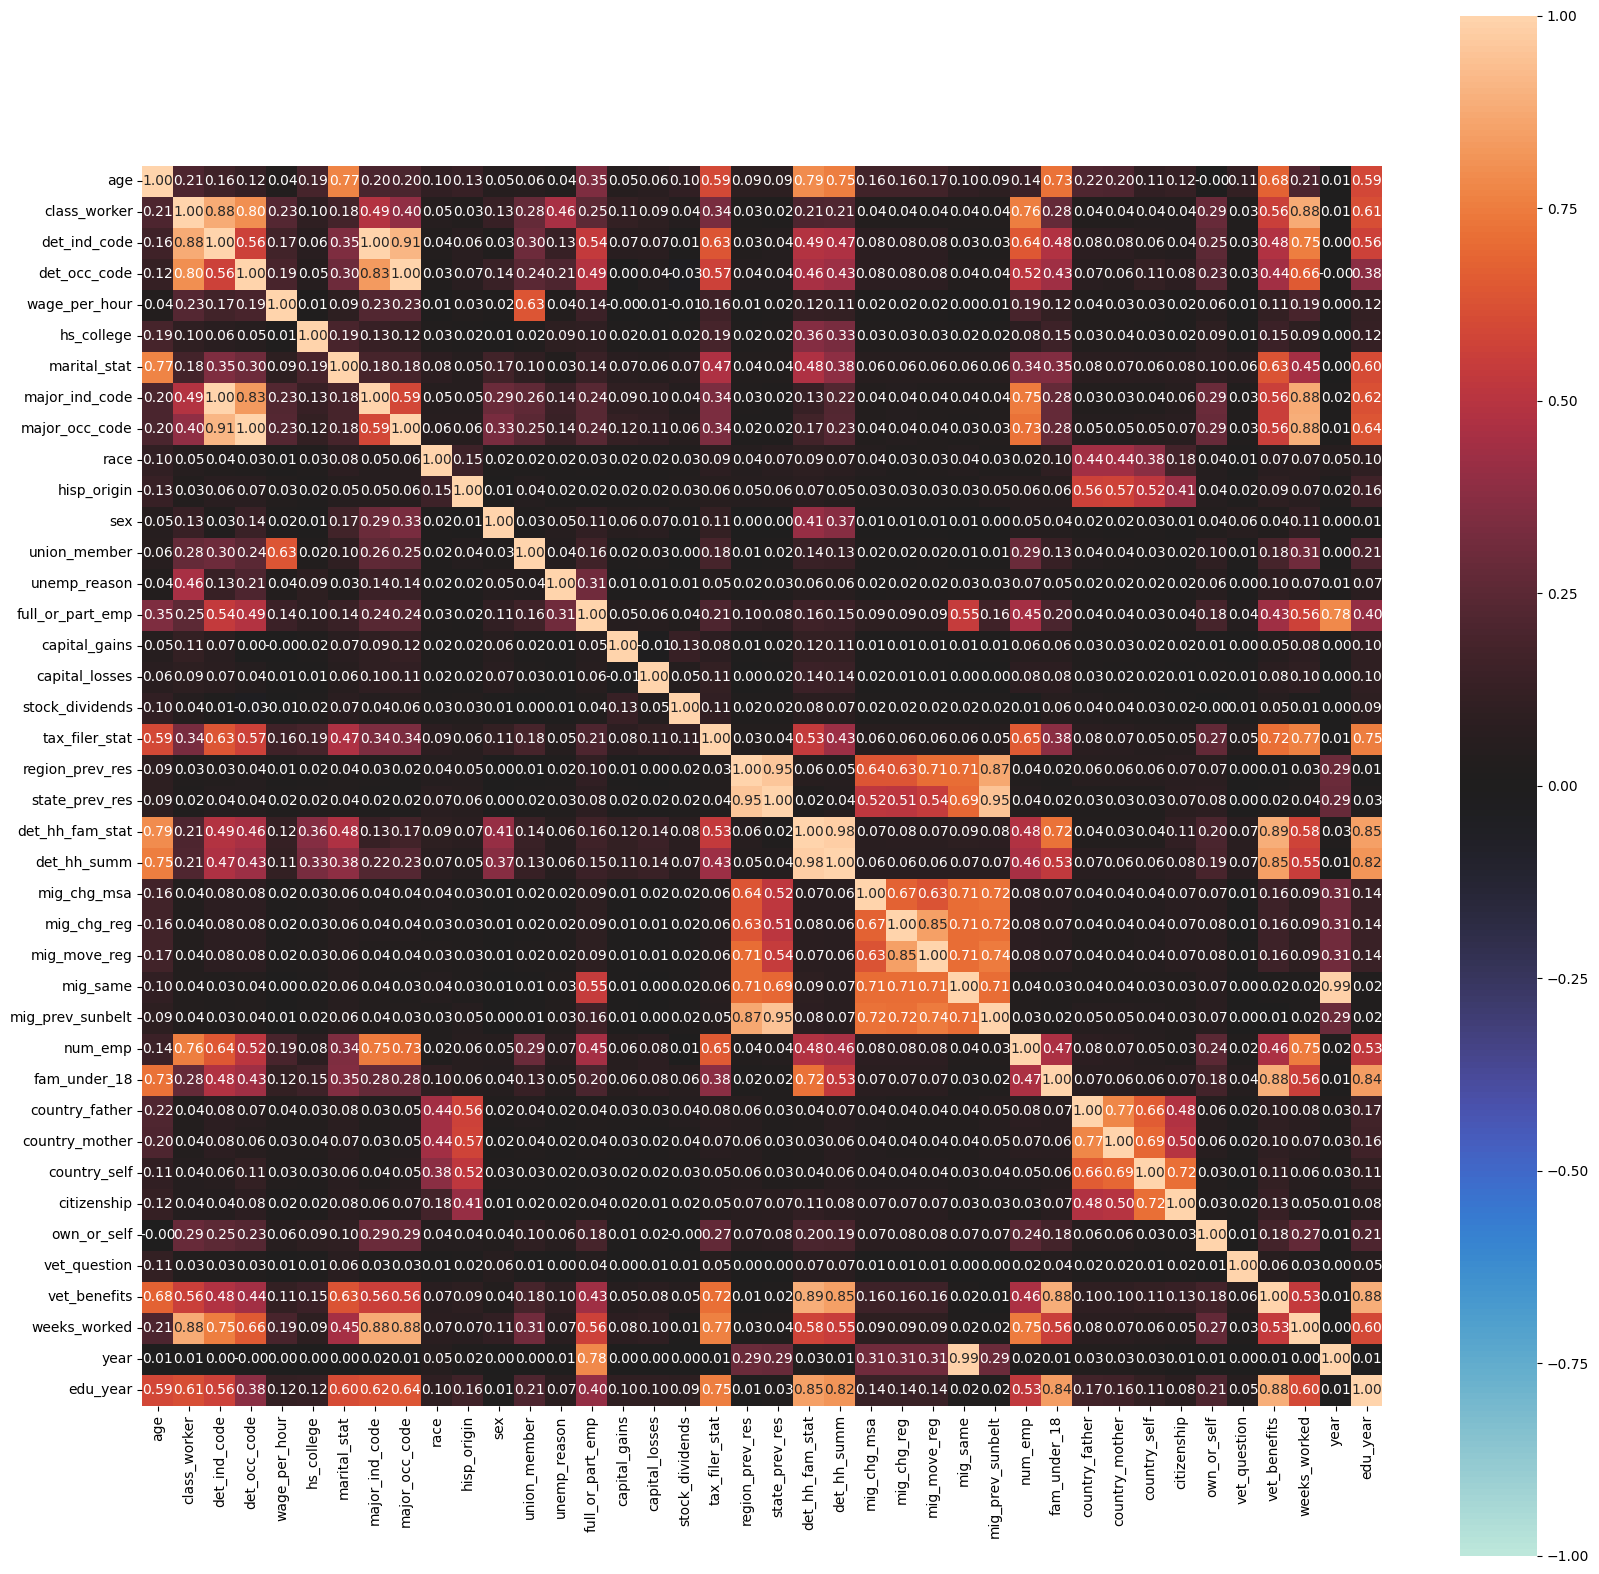

Original Feature Count: 40
Dropped 6 features: ['major_ind_code', 'major_occ_code', 'state_prev_res', 'det_hh_summ', 'mig_prev_sunbelt', 'year']
Remaining Feature Count: 34


In [25]:

#coorelation analysis to remove collinear features basdd on non wieghted correlation matrix
import numpy as np
from dython.nominal import associations

def remove_collinear_features(X, categorical_cols, threshold=0.90):
    
    # 1. Compute Association Matrix (Features only)
    print("Computing correlation matrix (this may take a moment)...")
    results = associations(
        X, 
        nominal_columns=categorical_cols,
        plot=True,  # Turn off plot for speed if not needed
        figsize=(20, 20),
    )
    # Handle dython return type (it usually returns a dict {'corr': ...})
    if isinstance(results, dict):
        corr_matrix = results['corr']
    else:
        corr_matrix = results
    # 2. Identify Collinear Features
    # Use absolute value because -0.99 is just as redundant as 0.99
    corr_abs = corr_matrix.abs()
    # Select upper triangle of correlation matrix (k=1 drops diagonal)
    upper_tri = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))    
    # Find columns where any correlation > threshold
    dropped_features = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    # 3. Drop Features
    X_reduced = X.drop(columns=dropped_features)
    print(f"Original Feature Count: {X.shape[1]}")
    print(f"Dropped {len(dropped_features)} features: {dropped_features}")
    print(f"Remaining Feature Count: {X_reduced.shape[1]}")    
    return X_reduced, dropped_features

# Run the function on X_train
X_train_clean, dropped_cols = remove_collinear_features(X_train, categorical_features, threshold=0.9)


In [26]:
X_test_clean = X_test.drop(columns=dropped_cols)

In [27]:
w_train

19304      999.71
190135    1301.89
103736    1078.72
111242     538.50
41624     2168.11
           ...   
15778      455.31
75089      967.27
196308    2421.41
31906     1408.54
56690     1467.78
Name: weight, Length: 159618, dtype: float64

### Recursive feature Elimination

In [29]:
import sklearn
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# 1. Enable Metadata Routing (Required for passing weights in modern sklearn)
sklearn.set_config(enable_metadata_routing=True)

# 2. Initialize Classifier and explicitly request sample weights for training
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.set_fit_request(sample_weight=True)

# 3. Initialize RFECV
rfecv = RFECV(estimator=clf_rf, step=1, cv=5, scoring='f1')

# 4. Fit with sample_weight passed DIRECTLY as a keyword argument
# (Do not use fit_params={'sample_weight': ...})
rfecv.fit(X_train_clean, y_train, sample_weight=w_train)
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 17


In [57]:
selected_features =X_train_clean.columns[rfecv.support_]

In [33]:
selected_features

Index(['age', 'class_worker', 'det_ind_code', 'det_occ_code', 'marital_stat',
       'sex', 'full_or_part_emp', 'capital_gains', 'capital_losses',
       'stock_dividends', 'tax_filer_stat', 'det_hh_fam_stat', 'mig_same',
       'num_emp', 'country_mother', 'weeks_worked', 'edu_year'],
      dtype='object')

In [35]:
selected_features =['age', 'class_worker', 'det_ind_code', 'det_occ_code', 'marital_stat',
       'sex', 'full_or_part_emp', 'capital_gains', 'capital_losses',
       'stock_dividends', 'tax_filer_stat', 'det_hh_fam_stat', 'mig_same',
       'num_emp', 'country_mother', 'weeks_worked', 'edu_year']

In [36]:
X_train_f = X_train_clean[selected_features]
X_test_f = X_test_clean[selected_features]

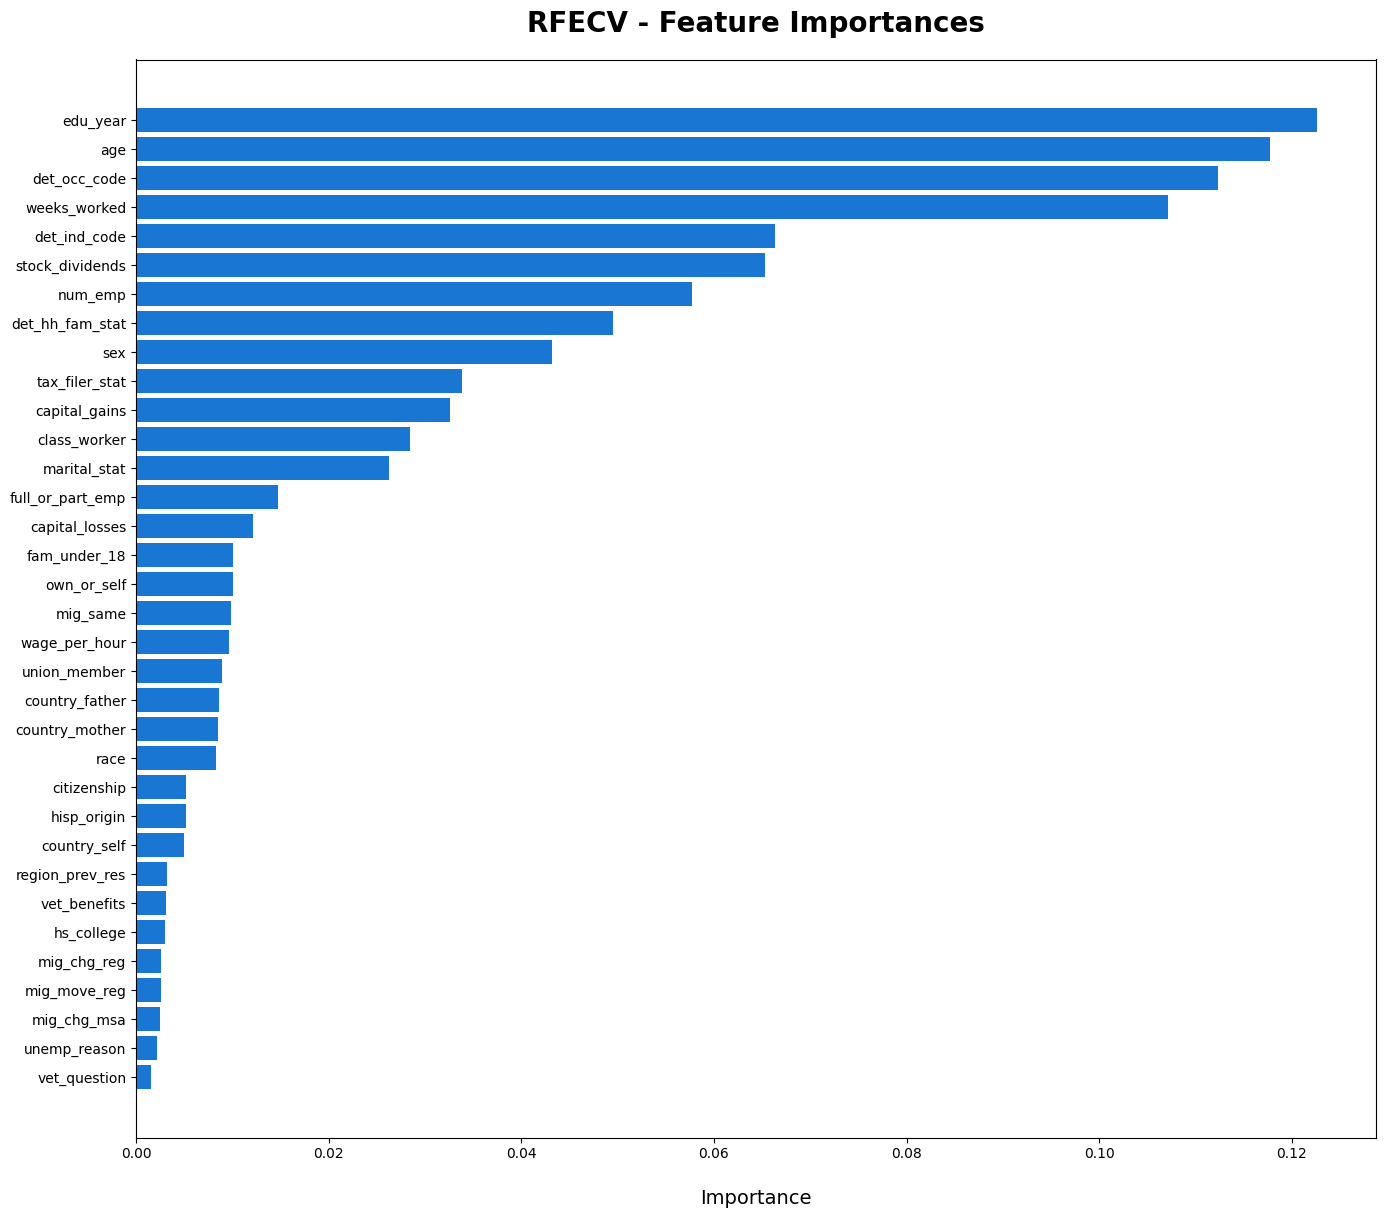

In [39]:
dset = pd.DataFrame()
data1 = X_train_clean

dset['attr'] = data1.columns

clf_rf.fit(X_train_clean, y_train, sample_weight=w_train)
dset['importance'] = clf_rf.feature_importances_
#Sorting with importance column
dset = dset.sort_values(by='importance', ascending=True)

#Barplot indicating Feature Importance
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [74]:
!pip install catboost

In [75]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   -- ------------------------------------- 5.0/72.0 MB 30.2 MB/s eta 0:00:03
   ------- -------------------------------- 13.1/72.0 MB 37.4 MB/s eta 0:00:02
   ------------ --------------------------- 21.8/72.0 MB 38.2 MB/s eta 0:00:02
   ----------------- ---------------------- 30.9/72.0 MB 39.3 MB/s eta 0:00:02
   --------------------- ------------------ 39.3/72.0 MB 39.1 MB/s eta 0:00:01
   -------------------------- ------------- 48.2/72.0 MB 39.9 MB/s eta 0:00:01
   ------------------------------- -------- 56.9/72.0 MB 40.3 MB/s eta 0:00:01
   ------------------------------------ --- 66.1/72.0 MB 40.5 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 40.9 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 38.2 MB/s  0:00:01


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,f1_score,log_loss,confusion_matrix,classification_report,precision_score,recall_score

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, BaggingClassifier)
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (roc_curve, roc_auc_score, accuracy_score, f1_score, 
                             log_loss, confusion_matrix, classification_report, 
                             precision_score, recall_score)
classifier_lg = LogisticRegression(random_state=0 , max_iter=500)
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_nb = GaussianNB()
classifier_knn = KNeighborsClassifier()
classifier_bag = BaggingClassifier(random_state=0)
classifier_rf  = RandomForestClassifier(random_state=0)
classifier_boost = AdaBoostClassifier(random_state=0)
classifier_gboost = GradientBoostingClassifier(random_state=0)
classifier_xgb = XGBClassifier(random_state=0)
classifier_lbgm = LGBMClassifier(random_state=0)
classifier_cgb = CatBoostClassifier(random_state=0)
classifier_mlp = MLPClassifier(random_state=0, max_iter=500)



# SVC takes a long time to train, so we will skip it for now , could use linear SVC if needed

In [44]:
import pandas as pd
import sklearn
from sklearn.metrics import (roc_curve, roc_auc_score, accuracy_score, f1_score, 
                             log_loss, confusion_matrix, classification_report, 
                             precision_score, recall_score)

# 1. Disable Strict Routing (Fixes AdaBoost/Bagging Errors)
sklearn.set_config(enable_metadata_routing=False)

results_list = []

classifiers = [
    classifier_lg, classifier_dt, classifier_nb, classifier_knn, 
    classifier_bag, classifier_rf, classifier_boost,
    classifier_gboost, classifier_xgb, classifier_lbgm, classifier_cgb,
    classifier_mlp
]

for cls in classifiers:
    name = cls.__class__.__name__
    print(f"Training {name}...")
    
    # --- A. Fit with Universal Weight Logic ---
    try:
        # 1. Try Native Support First
        # Most sklearn models & XGB/LGBM/CatBoost support sample_weight
        # Note: GaussianNB DOES support weights in modern sklearn
        if name in ['KNeighborsClassifier', 'MLPClassifier']: 
            raise TypeError("Force resampling for models known to lack weight support")
            
        model = cls.fit(X_train_clean, y_train, sample_weight=w_train)
        
    except (TypeError, ValueError) as e:
        # 2. Fallback: Resampling for models without weight support
        print(f"  -> {name} does not support weights directly. Resampling data...")
        
        # Combine X, y, w temporarily
        train_data = X_train_clean.copy()
        train_data['target_temp'] = y_train
        
        # Sample with replacement, prob proportional to weights
        # We sample n_samples equal to original size to maintain scale
        train_resampled = train_data.sample(
            n=len(train_data), 
            weights=w_train, 
            replace=True, 
            random_state=42
        )
        
        X_res = train_resampled.drop('target_temp', axis=1)
        y_res = train_resampled['target_temp']
        
        # Fit on resampled data (Unweighted fit, but data is now effectively weighted)
        model = cls.fit(X_res, y_res)

    # --- B. Prediction ---
    y_proba = model.predict_proba(X_test_clean)[:, 1]
    y_pred = model.predict(X_test_clean)
    
    # --- C. Weighted Metrics (Critical step!) ---
    # Even if trained with resampling, we evaluate on the ORIGINAL test set using weights
    
    print(cls.__class__.__name__)
    print('Weighted Confusion Matrix:\n', confusion_matrix(y_test, y_pred, sample_weight=w_test))
    print('Weighted Classification Report:\n', classification_report(y_test, y_pred, sample_weight=w_test))
    print('='*80)
    
    # Calculate Metrics
    fpr, tpr, _ = roc_curve(y_test, y_proba, sample_weight=w_test)
    auc = roc_auc_score(y_test, y_proba, sample_weight=w_test)
    accuracy = accuracy_score(y_test, y_pred, sample_weight=w_test)
    f1score = f1_score(y_test, y_pred, sample_weight=w_test)
    logloss = log_loss(y_test, y_proba, sample_weight=w_test)
    cm = confusion_matrix(y_test, y_pred, sample_weight=w_test)
    precision = precision_score(y_test, y_pred, sample_weight=w_test)
    recall = recall_score(y_test, y_pred, sample_weight=w_test)
    
    # Append to List
    results_list.append({
        'classifiers': name,
        'fpr': fpr, 'tpr': tpr, 'Roc Auc': auc, 'Accuracy': accuracy,
        'f1 Score': f1score, 'logloss': logloss, 'Confusion Matrix': cm,
        'Precision': precision, 'Recall': recall
    })

# 3. Create DataFrame
result_table = pd.DataFrame(results_list)
result_table.set_index('classifiers', inplace=True)

# Display result sorted by F1 Score (usually best metric for this)
print(result_table)


Training LogisticRegression...


c:\Users\prade\.conda\envs\chase\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Weighted Confusion Matrix:
 [[54489948.9399998  10463152.73999998]
 [  473502.61        4009977.95000001]]
Weighted Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91 64953101.679999925
           1       0.28      0.89      0.42 4483480.5600000145

    accuracy                           0.84 69436582.23999994
   macro avg       0.63      0.87      0.67 69436582.23999994
weighted avg       0.95      0.84      0.88 69436582.23999994

Training DecisionTreeClassifier...
DecisionTreeClassifier
Weighted Confusion Matrix:
 [[62452035.49000013  2501066.19      ]
 [ 2388459.86000001  2095020.7       ]]
Weighted Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96 64953101.679999925
           1       0.46      0.47      0.46 4483480.5600000145

    accuracy                           0.93 69436582.23999994
   macro avg       0.71      0

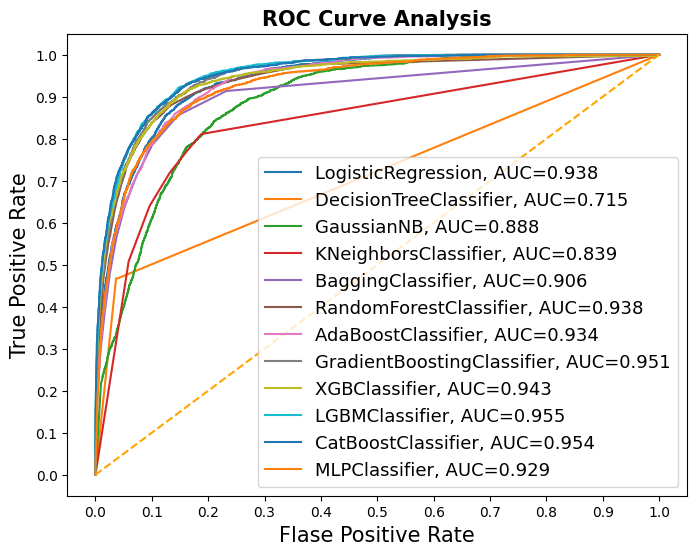

In [47]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['Roc Auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [48]:
result_table[['Roc Auc','Accuracy','f1 Score','logloss','Confusion Matrix','Precision','Recall']]

,Roc Auc,Accuracy,f1 Score,logloss,Confusion Matrix,Precision,Recall
classifiers,,,,,,,
LogisticRegression,0.938474,0.842494,0.423069,0.334003,"[[54489948.9399998, 10463152.739999976], [4735...",0.277064,0.894390
DecisionTreeClassifier,0.714705,0.929583,0.461480,2.473944,"[[62452035.49000013, 2501066.190000003], [2388...",0.455827,0.467276
GaussianNB,0.888331,0.684237,0.274942,2.673315,"[[43354015.7799999, 21599085.90000004], [32640...",0.161401,0.927198
KNeighborsClassifier,0.838995,0.858366,0.396112,2.542546,"[[56376552.40999979, 8576549.270000026], [1258...",0.273296,0.719405
BaggingClassifier,0.906233,0.936927,0.537308,0.441125,"[[62514106.36000012, 2438995.3200000017], [194...",0.510430,0.567174
RandomForestClassifier,0.938475,0.951734,0.514769,0.170235,"[[64307419.11999995, 645682.5600000003], [2705...",0.733564,0.396506
AdaBoostClassifier,0.934488,0.836782,0.410658,0.472272,"[[54154684.54999971, 10798417.129999945], [534...",0.267755,0.880694
GradientBoostingClassifier,0.950769,0.859480,0.452084,0.299385,"[[55654061.419999786, 9299040.259999968], [458...",0.302102,0.897811
XGBClassifier,0.943355,0.886475,0.493544,0.250965,"[[57712863.71999974, 7240237.96000001], [64256...",0.346617,0.856683


In [45]:
import pandas as pd
import sklearn
from sklearn.metrics import (roc_curve, roc_auc_score, accuracy_score, f1_score, 
                             log_loss, confusion_matrix, classification_report, 
                             precision_score, recall_score)

# 1. Disable Strict Routing (Fixes AdaBoost/Bagging Errors)
sklearn.set_config(enable_metadata_routing=False)

results_list = []

classifiers = [
    classifier_lg, classifier_dt, classifier_nb, classifier_knn, 
    classifier_bag, classifier_rf, classifier_boost,
    classifier_gboost, classifier_xgb, classifier_lbgm, classifier_cgb,
    classifier_mlp
]

for cls in classifiers:
    name = cls.__class__.__name__
    print(f"Training {name}...")
    
    # --- A. Fit with Universal Weight Logic ---
    try:
        # 1. Try Native Support First
        # Most sklearn models & XGB/LGBM/CatBoost support sample_weight
        # Note: GaussianNB DOES support weights in modern sklearn
        if name in ['KNeighborsClassifier', 'MLPClassifier']: 
            raise TypeError("Force resampling for models known to lack weight support")
            
        model = cls.fit(X_train_clean, y_train, sample_weight=w_train)
        
    except (TypeError, ValueError) as e:
        # 2. Fallback: Resampling for models without weight support
        print(f"  -> {name} does not support weights directly. Resampling data...")
        
        # Combine X, y, w temporarily
        train_data = X_train_clean.copy()
        train_data['target_temp'] = y_train
        
        # Sample with replacement, prob proportional to weights
        # We sample n_samples equal to original size to maintain scale
        train_resampled = train_data.sample(
            n=len(train_data), 
            weights=w_train, 
            replace=True, 
            random_state=42
        )
        
        X_res = train_resampled.drop('target_temp', axis=1)
        y_res = train_resampled['target_temp']
        
        # Fit on resampled data (Unweighted fit, but data is now effectively weighted)
        model = cls.fit(X_res, y_res)

    # --- B. Prediction ---
    y_proba = model.predict_proba(X_test_clean)[:, 1]
    y_pred = model.predict(X_test_clean)
    
    # --- C. Weighted Metrics (Critical step!) ---
    # Even if trained with resampling, we evaluate on the ORIGINAL test set using weights
    
    print(cls.__class__.__name__)
    print('Weighted Confusion Matrix:\n', confusion_matrix(y_test, y_pred, sample_weight=w_test))
    print('Weighted Classification Report:\n', classification_report(y_test, y_pred, sample_weight=w_test))
    print('='*80)
    
    # Calculate Metrics
    fpr, tpr, _ = roc_curve(y_test, y_proba, sample_weight=w_test)
    auc = roc_auc_score(y_test, y_proba, sample_weight=w_test)
    accuracy = accuracy_score(y_test, y_pred, sample_weight=w_test)
    f1score = f1_score(y_test, y_pred, sample_weight=w_test)
    logloss = log_loss(y_test, y_proba, sample_weight=w_test)
    cm = confusion_matrix(y_test, y_pred, sample_weight=w_test)
    precision = precision_score(y_test, y_pred, sample_weight=w_test)
    recall = recall_score(y_test, y_pred, sample_weight=w_test)
    
    # Append to List
    results_list.append({
        'classifiers': name,
        'fpr': fpr, 'tpr': tpr, 'Roc Auc': auc, 'Accuracy': accuracy,
        'f1 Score': f1score, 'logloss': logloss, 'Confusion Matrix': cm,
        'Precision': precision, 'Recall': recall
    })

# 3. Create DataFrame
result_table = pd.DataFrame(results_list)
result_table.set_index('classifiers', inplace=True)

# Display result sorted by F1 Score (usually best metric for this)
print(result_table)


Training LogisticRegression...


c:\Users\prade\.conda\envs\chase\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Weighted Confusion Matrix:
 [[54489948.9399998  10463152.73999998]
 [  473502.61        4009977.95000001]]
Weighted Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91 64953101.679999925
           1       0.28      0.89      0.42 4483480.5600000145

    accuracy                           0.84 69436582.23999994
   macro avg       0.63      0.87      0.67 69436582.23999994
weighted avg       0.95      0.84      0.88 69436582.23999994

Training DecisionTreeClassifier...
DecisionTreeClassifier
Weighted Confusion Matrix:
 [[62452035.49000013  2501066.19      ]
 [ 2388459.86000001  2095020.7       ]]
Weighted Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96 64953101.679999925
           1       0.46      0.47      0.46 4483480.5600000145

    accuracy                           0.93 69436582.23999994
   macro avg       0.71      0

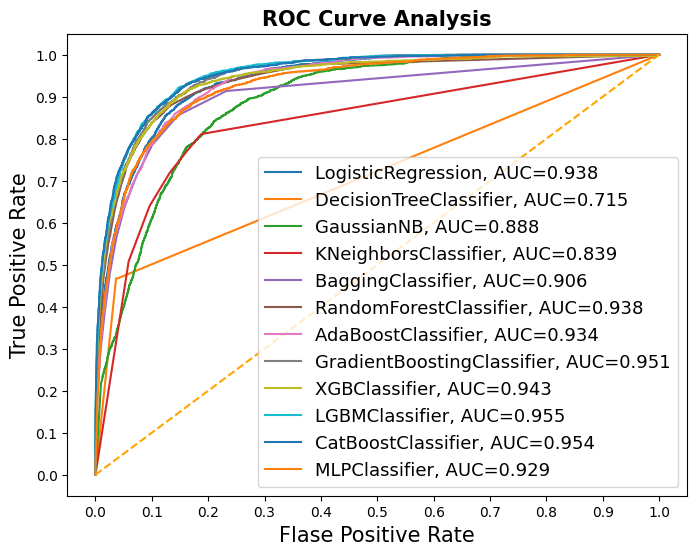

In [46]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['Roc Auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [48]:
result_table[['Roc Auc','Accuracy','f1 Score','logloss','Confusion Matrix','Precision','Recall']]

,Roc Auc,Accuracy,f1 Score,logloss,Confusion Matrix,Precision,Recall
classifiers,,,,,,,
LogisticRegression,0.938474,0.842494,0.423069,0.334003,"[[54489948.9399998, 10463152.739999976], [4735...",0.277064,0.894390
DecisionTreeClassifier,0.714705,0.929583,0.461480,2.473944,"[[62452035.49000013, 2501066.190000003], [2388...",0.455827,0.467276
GaussianNB,0.888331,0.684237,0.274942,2.673315,"[[43354015.7799999, 21599085.90000004], [32640...",0.161401,0.927198
KNeighborsClassifier,0.838995,0.858366,0.396112,2.542546,"[[56376552.40999979, 8576549.270000026], [1258...",0.273296,0.719405
BaggingClassifier,0.906233,0.936927,0.537308,0.441125,"[[62514106.36000012, 2438995.3200000017], [194...",0.510430,0.567174
RandomForestClassifier,0.938475,0.951734,0.514769,0.170235,"[[64307419.11999995, 645682.5600000003], [2705...",0.733564,0.396506
AdaBoostClassifier,0.934488,0.836782,0.410658,0.472272,"[[54154684.54999971, 10798417.129999945], [534...",0.267755,0.880694
GradientBoostingClassifier,0.950769,0.859480,0.452084,0.299385,"[[55654061.419999786, 9299040.259999968], [458...",0.302102,0.897811
XGBClassifier,0.943355,0.886475,0.493544,0.250965,"[[57712863.71999974, 7240237.96000001], [64256...",0.346617,0.856683


In [66]:
X_train_f.columns

Index(['age', 'class_worker', 'det_ind_code', 'det_occ_code', 'marital_stat',
       'sex', 'full_or_part_emp', 'capital_gains', 'capital_losses',
       'stock_dividends', 'tax_filer_stat', 'det_hh_fam_stat', 'mig_same',
       'num_emp', 'country_mother', 'weeks_worked', 'edu_year'],
      dtype='object')

# Segmentations

In [89]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
data_df

In [90]:
X_train_resampled = X_train_clean.sample(
    n=len(X_train_clean), 
    weights=w_train, 
    replace=True, 
    random_state=42
)

In [91]:
numerical_features

Index(['age', 'det_ind_code', 'det_occ_code', 'wage_per_hour', 'capital_gains',
       'capital_losses', 'stock_dividends', 'num_emp', 'own_or_self',
       'vet_benefits', 'weeks_worked', 'year', 'edu_year'],
      dtype='object')

In [ ]:
# K - means clustering on numerical features
numerical_features_for_clustering = [
    'age', 'wage_per_hour', 'capital_gains', 'capital_losses', 
    'stock_dividends', 'weeks_worked', 'num_emp' , 'edu_year'
]

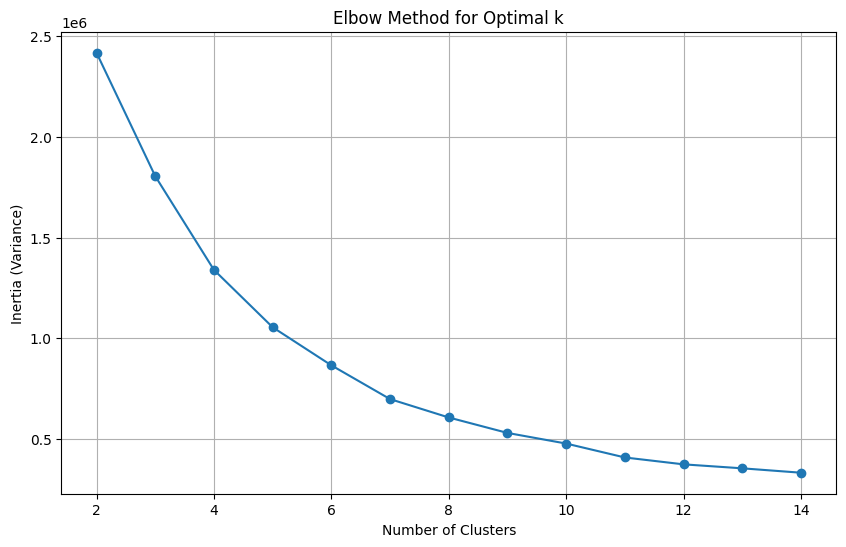

In [75]:
X_segment_num_train = X_train_resampled[numerical_features_for_clustering].copy()
inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_segment_num_train)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Variance)')
plt.grid(True)
plt.show()


k=2: Silhouette Score = 0.8212
k=3: Silhouette Score = 0.8232
k=4: Silhouette Score = 0.6297
k=5: Silhouette Score = 0.4099
k=6: Silhouette Score = 0.4445
k=7: Silhouette Score = 0.4564
k=8: Silhouette Score = 0.4619
k=9: Silhouette Score = 0.4056
k=10: Silhouette Score = 0.4835
k=11: Silhouette Score = 0.4320
k=12: Silhouette Score = 0.4347
k=13: Silhouette Score = 0.4423
k=14: Silhouette Score = 0.4408


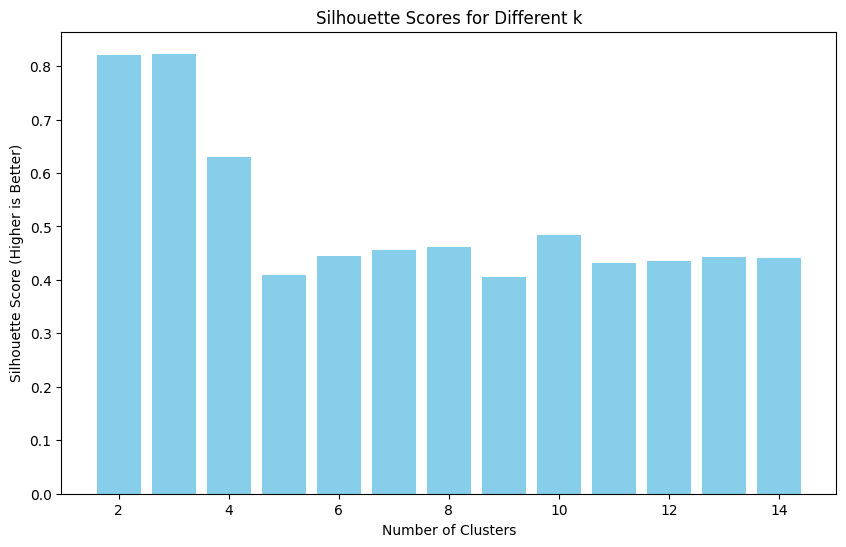

Best k according to Silhouette: 3


In [76]:
from sklearn.metrics import silhouette_score


silhouette_scores = []
# Use a sample for speed (e.g., 10,000 rows), or use full X_segment_num_train if < 20k rows
sample_size = 10000 
if len(X_segment_num_train) > sample_size:
    indices = np.random.choice(len(X_segment_num_train), sample_size, replace=False)
    X_sample = X_segment_num_train.iloc[indices] 
else:
    X_sample = X_segment_num_train

K_range = range(2, 15)  # Check k=2 to k=7

for k in K_range:
    # We must re-fit on the sample to get labels for the sample
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_sample)
    
    # Calculate score
    score = silhouette_score(X_sample, labels_temp)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.bar(K_range, silhouette_scores, color='skyblue')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score (Higher is Better)')
plt.show()

# Select k with the highest score
best_k_sil = K_range[np.argmax(silhouette_scores)]
print(f"Best k according to Silhouette: {best_k_sil}")


In [81]:
# considering k = 6 as optimal from elbow and silhouette methods
k_optimal = 5
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_segment_num_train)

# Add Cluster Labels to original data for interpretation
X_segment_num_train['Cluster'] = clusters

# 5. Cluster Interpretation (Marketing Profiles)
# Calculate mean values for each cluster to understand "who" they are
cluster_summary = X_segment_num_train.groupby('Cluster').mean()

# Add size of each cluster
cluster_summary['Count'] = X_segment_num_train['Cluster'].value_counts()
cluster_summary['Percent'] = (cluster_summary['Count'] / len(X_segment_num_train)) * 100

print("\n--- Marketing Segmentation Profiles ---")
print(cluster_summary.round(2).T)


--- Marketing Segmentation Profiles ---
Cluster                    0        1         2        3       4
age                     0.36     0.48     -0.09     0.52    1.10
wage_per_hour           0.16     0.09     -0.19    -0.09    0.04
capital_gains           0.24    -0.09     -0.05    21.20    2.89
capital_losses         -0.14     7.33     -0.14    -0.14    0.98
stock_dividends         0.16     0.38      0.07     0.85   26.63
weeks_worked            1.06     0.98     -0.90     1.14    0.29
num_emp                 0.93     0.82     -0.77     0.70    0.11
edu_year                0.87     0.98     -0.48     1.23    0.97
True_Income_Label       0.06     0.06      0.06     0.06    0.06
Count              101399.00  8717.00  46332.00  2222.00  948.00
Percent                63.53     5.46     29.03     1.39    0.59


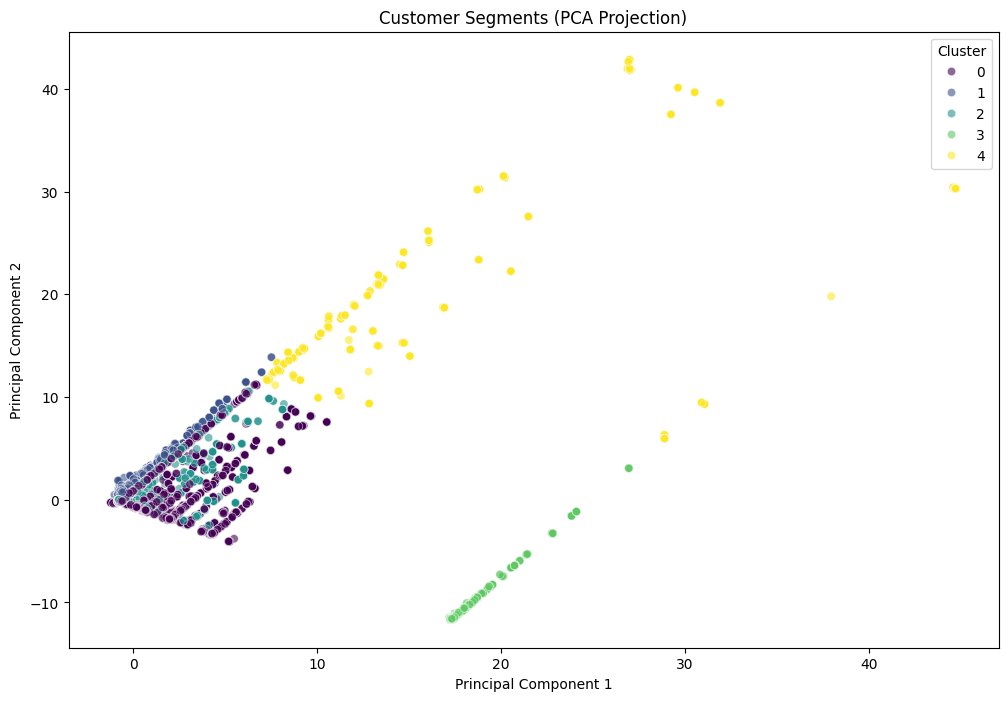

In [82]:
# 6. Visualization (PCA 2D Projection)
# Reduce to 2 dimensions just for visualization
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_segment_num_train)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.6)
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [83]:
X_segment_num_train['True_Income_Label'] = y_train.values

# Calculate % of High Earners per Cluster
income_breakdown = X_segment_num_train.groupby('Cluster')['True_Income_Label'].mean() * 100
print("\nPercentage of High Earners (>50k) by Cluster:")
print(income_breakdown)


Percentage of High Earners (>50k) by Cluster:
Cluster
0    6.205189
1    5.976827
2    6.272123
3    5.940594
4    5.801688
Name: True_Income_Label, dtype: float64


In [84]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y_train, clusters)
nmi = normalized_mutual_info_score(y_train, clusters)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Info (NMI): {nmi:.4f}")
# Note: Low scores aren't 'bad' for segmentation; they just mean 
# demographic segments don't perfectly map 1-to-1 with income (which is expected).


Adjusted Rand Index (ARI): -0.0003
Normalized Mutual Info (NMI): 0.0000


In [87]:
X_segment_with_target = X_segment_num_train.copy()
X_segment_with_target['income_label'] = y_train.values


# Run K-Means on this enriched dataset
kmeans_supervised = KMeans(n_clusters=4, random_state=42)
clusters_supervised = kmeans_supervised.fit_predict(X_segment_with_target)

# Add Cluster Labels to original data for interpretation
X_segment_num_train['Cluster'] = clusters

# 5. Cluster Interpretation (Marketing Profiles)
# Calculate mean values for each cluster to understand "who" they are
cluster_summary = X_segment_num_train.groupby('Cluster').mean()

# Add size of each cluster
cluster_summary['Count'] = X_segment_num_train['Cluster'].value_counts()
cluster_summary['Percent'] = (cluster_summary['Count'] / len(X_segment_num_train)) * 100

print("\n--- Marketing Segmentation Profiles ---")
print(cluster_summary.round(2).T)


--- Marketing Segmentation Profiles ---
Cluster                    0        1         2        3       4
age                     0.36     0.48     -0.09     0.52    1.10
wage_per_hour           0.16     0.09     -0.19    -0.09    0.04
capital_gains           0.24    -0.09     -0.05    21.20    2.89
capital_losses         -0.14     7.33     -0.14    -0.14    0.98
stock_dividends         0.16     0.38      0.07     0.85   26.63
weeks_worked            1.06     0.98     -0.90     1.14    0.29
num_emp                 0.93     0.82     -0.77     0.70    0.11
edu_year                0.87     0.98     -0.48     1.23    0.97
True_Income_Label       0.06     0.06      0.06     0.06    0.06
Count              101399.00  8717.00  46332.00  2222.00  948.00
Percent                63.53     5.46     29.03     1.39    0.59


In [88]:
X_segment_num_train['True_Income_Label'] = y_train.values

# Calculate % of High Earners per Cluster
income_breakdown = X_segment_num_train.groupby('Cluster')['True_Income_Label'].mean() * 100
print("\nPercentage of High Earners (>50k) by Cluster:")
print(income_breakdown)


Percentage of High Earners (>50k) by Cluster:
Cluster
0    6.205189
1    5.976827
2    6.272123
3    5.940594
4    5.801688
Name: True_Income_Label, dtype: float64


In [95]:
X_train_resampled

,age,class_worker,det_ind_code,det_occ_code,wage_per_hour,hs_college,marital_stat,race,hisp_origin,sex,...,fam_under_18,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,edu_year
69133,1.322487,3,-0.849740,-0.782235,-0.201629,2,2,4,0,0,...,4,39,39,39,4,-0.316851,1,0.569799,-0.949346,0.393168
15706,0.201956,5,1.253533,1.500844,-0.201629,2,2,4,1,1,...,4,39,39,39,0,-0.316851,1,0.569799,1.180804,1.055040
175160,0.291598,4,0.423294,-0.505498,-0.201629,2,2,4,0,1,...,4,39,39,39,4,-0.316851,1,0.569799,1.180804,1.385976
71793,0.650168,4,1.640978,0.047975,-0.201629,2,2,4,0,0,...,4,39,39,39,4,-0.316851,1,0.569799,1.180804,1.055040
52855,-0.604827,4,0.976786,0.532265,-0.201629,2,4,2,0,0,...,4,39,39,39,4,-0.316851,1,0.569799,-0.949346,-0.103236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154055,1.232845,4,0.755389,0.255528,2.890452,2,2,4,0,1,...,4,39,39,39,4,-0.316851,1,0.569799,1.180804,1.385976
10423,-0.963397,3,-0.849740,-0.782235,-0.201629,2,4,2,0,1,...,2,39,39,39,4,-0.316851,1,-1.779077,-0.949346,-1.592448
64465,0.426062,0,1.917724,-0.505498,-0.201629,2,0,4,0,1,...,4,39,39,39,4,-0.316851,1,0.569799,1.180804,1.055040
166965,0.650168,5,0.976786,-0.643867,-0.201629,2,2,4,0,1,...,4,39,39,39,4,-0.316851,1,0.569799,1.180804,1.385976


In [96]:
data_df

,age,class_worker,det_ind_code,det_occ_code,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,race,...,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year,income_50k,edu_year
0,73,Not in universe,0,0,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0,12.0
1,58,Self-employed-not incorporated,4,34,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0,14.0
2,18,Not in universe,0,0,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0,10.0
3,9,Not in universe,0,0,0,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0,0.0
4,10,Not in universe,0,0,0,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0,7.5
199519,65,Self-employed-incorporated,37,2,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0,11.0
199520,47,Not in universe,0,0,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,0,14.0
199521,16,Not in universe,0,0,0,High school,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0,10.0


In [97]:
X_seg = data_df.copy()

In [104]:
X_seg.drop('income_50k', axis=1, inplace=True)

In [105]:
X_seg_train = X_seg.iloc[X_train_resampled.index,:]
X_seg_test = X_seg.iloc[X_test_clean.index,:]

In [108]:
import gower
distance_matrix = gower.gower_matrix(X_seg_train)

MemoryError: Unable to allocate 94.9 GiB for an array with shape (159618, 159618) and data type float32

In [ ]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.3, 
                        min_samples=2, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
X_train_resampled["cluster"] = dbscan_cluster.labels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib
import os

# ==========================================
# 1. Configuration & Metadata
# ==========================================
# Full column names for the Census-Income (KDD) dataset
COLUMNS = [
    'age', 'class_worker', 'det_ind_code', 'det_occ_code', 'education', 'wage_per_hour',
    'hs_college', 'marital_stat', 'major_ind_code', 'major_occ_code', 'race', 'hisp_origin',
    'sex', 'union_member', 'unemp_reason', 'full_or_part_emp', 'capital_gains',
    'capital_losses', 'stock_dividends', 'tax_filer_stat', 'region_prev_res',
    'state_prev_res', 'det_hh_fam_stat', 'det_hh_summ', 'mig_chg_msa', 'mig_chg_reg',
    'mig_move_reg', 'mig_same', 'mig_prev_sunbelt', 'num_emp', 'fam_under_18',
    'country_father', 'country_mother', 'country_self', 'citizenship', 'own_or_self',
    'vet_question', 'vet_benefits', 'weeks_worked', 'year', 'income'
]

# Features selected for Marketing Segmentation
FEATURES_NUM = ['age', 'capital_gains', 'capital_losses', 'weeks_worked' , 'edu_year']
FEATURES_CAT = ['class_worker', , 'marital_stat', 'sex']

def load_data(filepath, sample_size=None):
    """
    Loads data from CSV. Handles sampling if memory is constrained.
    """
    print(f"Loading data from {filepath}...")
    # The dataset usually lacks headers, so we supply them
    df = pd.read_csv(filepath, header=None, names=COLUMNS, skipinitialspace=True)
    
    if sample_size and len(df) > sample_size:
        print(f"Sampling {sample_size} records for training...")
        df = df.sample(n=sample_size, random_state=42)
        
    # Basic cleaning
    # Replace '?' with 'Unknown' (common in this dataset)
    df = df.replace('?', 'Unknown')
    
    return df

def build_pipeline(n_clusters=5):
    """
    Creates the preprocessing and clustering pipeline.
    """
    # 1. Numeric Transformer: Scale data to mean=0, std=1
    numeric_transformer = StandardScaler()

    # 2. Categorical Transformer: One-Hot Encoding
    # handle_unknown='ignore' ensures model works even if new rare categories appear later
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # 3. Combine them
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, FEATURES_NUM),
            ('cat', categorical_transformer, FEATURES_CAT)
        ]
    )

    # 4. Full Pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('cluster', KMeans(n_clusters=n_clusters, random_state=42, n_init=10))
    ])
    
    return pipeline

def analyze_clusters(df, pipeline, labels):
    """
    Generates a marketing profile for each cluster.
    """
    df_analysis = df.copy()
    df_analysis['Cluster'] = labels
    
    print("\n" + "="*50)
    print("SEGMENTATION ANALYSIS")
    print("="*50)
    
    # 1. Size of each segment
    segment_sizes = df_analysis['Cluster'].value_counts(normalize=True).sort_index()
    
    # 2. Numerical Profiles (Mean values)
    num_profile = df_analysis.groupby('Cluster')[FEATURES_NUM].mean()
    
    # 3. Categorical Profiles (Most frequent value / Mode)
    cat_profile = df_analysis.groupby('Cluster')[FEATURES_CAT].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'
    )
    
    # Combine and Print
    summary = pd.concat([num_profile, cat_profile], axis=1)
    summary['Population_Share'] = segment_sizes
    
    # Reorder columns for readability
    summary = summary[['Population_Share'] + FEATURES_NUM + FEATURES_CAT]
    
    print(summary.to_string(formatters={
        'Population_Share': '{:.1%}'.format,
        'age': '{:.1f}'.format,
        'capital_gains': '${:,.0f}'.format,
        'capital_losses': '${:,.0f}'.format,
        'weeks_worked': '{:.1f}'.format
    }))
    
    return summary

def plot_segments(df, pipeline, labels):
    """
    Visualizes segments using PCA 2D projection.
    """
    print("\nGenerating visualization...")
    
    # Extract the preprocessed matrix (before clustering)
    preprocessor = pipeline.named_steps['preprocessor']
    X_processed = preprocessor.transform(df)
    
    # Reduce to 2D for plotting
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_processed)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, s=15)
    plt.title('Customer Segments (PCA Projection)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Cluster ID')
    plt.grid(True, alpha=0.3)
    
    # Save plot
    plt.savefig('segmentation_plot.png')
    print("Plot saved as 'segmentation_plot.png'")
    plt.close()

def main():
    # Filter only used columns

    X = data_df.iloc[X_train.index,:][FEATURES_NUM + FEATURES_CAT].copy()
    
    # --- 2. Build & Train Model ---
    print("Training Segmentation Model (K=5)...")
    model = build_pipeline(n_clusters=5)
    model.fit(X)
    
    # Get labels
    labels = model.named_steps['cluster'].labels_
    
    # --- 3. Validate ---
    # Calculate Silhouette Score (on a sample for speed)
    X_transformed = model.named_steps['preprocessor'].transform(X)
    sil_score = silhouette_score(X_transformed, labels, sample_size=5000)
    print(f"\nModel Validation - Silhouette Score: {sil_score:.3f}")
    print("(Score > 0.3 indicates strong structure for demographic data)")

    # --- 4. Analyze Results ---
    profile = analyze_clusters(X, model, labels)
    
    # --- 5. Visualize ---
    plot_segments(X, model, labels)
    
    # --- 6. Save Model ---
    joblib.dump(model, 'marketing_segmentation_model.pkl')
    print("\nModel saved to 'marketing_segmentation_model.pkl'")
    
    # Save profiles to CSV for the marketing team
    profile.to_csv('segment_profiles.csv')
    print("Segment profiles saved to 'segment_profiles.csv'")

if __name__ == "__main__":
    main()


KeyError: "['education'] not in index"

In [113]:
data_df.columns

Index(['age', 'class_worker', 'det_ind_code', 'det_occ_code', 'wage_per_hour',
       'hs_college', 'marital_stat', 'major_ind_code', 'major_occ_code',
       'race', 'hisp_origin', 'sex', 'union_member', 'unemp_reason',
       'full_or_part_emp', 'capital_gains', 'capital_losses',
       'stock_dividends', 'tax_filer_stat', 'region_prev_res',
       'state_prev_res', 'det_hh_fam_stat', 'det_hh_summ', 'mig_chg_msa',
       'mig_chg_reg', 'mig_move_reg', 'mig_same', 'mig_prev_sunbelt',
       'num_emp', 'fam_under_18', 'country_father', 'country_mother',
       'country_self', 'citizenship', 'own_or_self', 'vet_question',
       'vet_benefits', 'weeks_worked', 'year', 'income_50k', 'edu_year'],
      dtype='object')